# Reading xrf pdz files with help of Luc

*Birgit asked if I could help with the data analysis of the ink measurements at Ets Haim (2020-014) with the new XRF spectrometer.*

    2020-07-05
    
## Luc's translated python code 

In [ ]:
from array import *

import struct
class XRFSpectrum:
    datapoints = array('l')
    energyPerChannel = 0
    def __init__(self):
        print("this is the constructor of XRFSpectrum")

def readByte(pdzfile):
    return struct.unpack("B",pdzfile.read(1))[0]

def readShort(pdzfile):
    return struct.unpack("<h",pdzfile.read(2))[0]

def readInt(pdzfile):
    return struct.unpack("<i",pdzfile.read(4))[0]

def read32bitFloat(pdzfile):
    return struct.unpack("<f",pdzfile.read(4))[0]

def readString(pdzfile):
    length = readInt(pdzfile)
    print("read string of length "+str(length))
    return pdzfile.read(length*2).decode("utf16")

def readSpectrumParameters(pdzfile,spectrum):
    print("spectrum parameters:")
    print(readInt(pdzfile))
    print(read32bitFloat(pdzfile))
    print(readInt(pdzfile))
    print(readInt(pdzfile))
    print(read32bitFloat(pdzfile))
    print(read32bitFloat(pdzfile))
    print("real time: "+str(read32bitFloat(pdzfile)))
    print("live time: "+str(read32bitFloat(pdzfile)))
    print(str(read32bitFloat(pdzfile)))
    print(read32bitFloat(pdzfile))
    print(read32bitFloat(pdzfile))
    print("tube voltage: "+str(read32bitFloat(pdzfile)))
    print("tube current: "+str(read32bitFloat(pdzfile)))
    print(read32bitFloat(pdzfile))
    print(read32bitFloat(pdzfile))
    print(read32bitFloat(pdzfile))
    print(read32bitFloat(pdzfile))
    print(read32bitFloat(pdzfile))
    print(readShort(pdzfile))
    print(read32bitFloat(pdzfile))
    spectrum.energyPerChannel = read32bitFloat(pdzfile)
    print("energy per channel (eV): "+str(spectrum.energyPerChannel))
    print(readInt(pdzfile))
    print("abscissa: "+str(read32bitFloat(pdzfile)))
    print(read32bitFloat(pdzfile))
    print(read32bitFloat(pdzfile))
    print(read32bitFloat(pdzfile))
    print(read32bitFloat(pdzfile))
    print(read32bitFloat(pdzfile))
    print(read32bitFloat(pdzfile))
    print("spectrum name: "+readString(pdzfile))
#    depending on measurement mode treat spectrum name differently    
    print(readShort(pdzfile))
    print("finished reading spectrum parameters")

def readSpectrumArray(pdzfile,spectrum):
    for i in range(2048):
        spectrum.datapoints.append(readInt(pdzfile))
    print("finished reading datapoints")

def main(pdzfile_name):
    spectrum = XRFSpectrum()
    spectrum2 = XRFSpectrum()
#    pdzfile = open("/home/luc/Documents/00020-Mudrock Dual.pdz","rb")
    #pdzfile = open("/home/luc/Documents/02959-Mudrock Dual.pdz","rb")
    pdzfile = open(pdzfile_name, "rb")
    version = readShort(pdzfile)
    print("version: ")
    print(version)
    if version != 25:
        print("wrong pdz version")
        exit()
    print(readInt(pdzfile))
    print(pdzfile.read(10).decode("utf16"))
    print(readInt(pdzfile))
    print(readShort(pdzfile))
    print(readInt(pdzfile))
    instrumentID = readString(pdzfile)
    print("instrument id: "+instrumentID)
    print(readString(pdzfile))
    print(pdzfile.read(6))
    print("detector type: "+readString(pdzfile))
    print(readString(pdzfile)+": "+str(readShort(pdzfile)))
    print(readString(pdzfile))
    listLength = readInt(pdzfile)
    for i in range(listLength):
        print(str(readShort(pdzfile))+": "+readString(pdzfile))
    print(readShort(pdzfile))
    print(readInt(pdzfile))
    print(readInt(pdzfile))
    print(readInt(pdzfile))
    print(readInt(pdzfile))
    print(readInt(pdzfile))
    print(readInt(pdzfile))

    print(read32bitFloat(pdzfile))
    print(read32bitFloat(pdzfile))
    print(read32bitFloat(pdzfile))
    print(read32bitFloat(pdzfile))
    print(read32bitFloat(pdzfile))
    print(read32bitFloat(pdzfile))

    measurementMode = readString(pdzfile)
    if measurementMode == "Artax":
        print("Artax version: "+readString(pdzfile))
    else:
        print("measurement mode: "+measurementMode+" "+str(readInt(pdzfile)))
    print("username: "+readString(pdzfile))
    print("some short: "+str(readShort(pdzfile)))
    readSpectrumParameters(pdzfile,spectrum)
#    here starts the array of 2048 32 bit integers (little endian)
    readSpectrumArray(pdzfile,spectrum)
    if measurementMode == "Artax":
        print("ready")
        exit()
    if readShort(pdzfile) == 3:
        readSpectrumParameters(pdzfile,spectrum2)
        readSpectrumArray(pdzfile,spectrum2)
        print(readShort(pdzfile))
        print(readInt(pdzfile))
        print(readInt(pdzfile))
        print(readInt(pdzfile))
        print(readInt(pdzfile))
        print(readShort(pdzfile))

In [ ]:
cd /home/frank/Work/Projecten/DoRe/notebooks/.2020-06-30-reading-xrf-pdz-files-with-help-of-luc

/mnt/datadisk/Work/Projecten/DoRe/notebooks/.2020-06-30-reading-xrf-pdz-files-with-help-of-luc


In [ ]:
!ls

'00886-Spectrometer Mode.pdz'		    PDZReader_py.txt
'01-lichte huid kin onder lip rechts.pdz'  'XRF measurments'
'02839-Mudrock Dual.pdz'		   'XRF measurments.zip'
 PdzReader.java


In [ ]:
pdzfile_name = '02839-Mudrock Dual.pdz'

In [ ]:
main(pdzfile_name)

this is the constructor of XRFSpectrum
this is the constructor of XRFSpectrum
version: 
25
14
pdz25
1
1
218
read string of length 8
instrument id: 900F4767
read string of length 8
SK5-4767
b'---A}\x00'
read string of length 3
detector type: SDD
read string of length 4
RxBx: 2056
read string of length 7
Movable
read string of length 10
1: 2.3.48.267
read string of length 5
2: 13.09
read string of length 4
3: 6.03
read string of length 4
4: 3.03
read string of length 4
5: 9.2F
read string of length 4
6: 1.02
read string of length 4
7: 1.11
read string of length 4
8: 1.01
2
88
1
131256
78756
0
0
0.937000036239624
0.6650000810623169
0.27400001883506775
0.2710000276565552
0.39100003242492676
1.0
read string of length 12
measurement mode: Mudrock Dual 0
read string of length 4
username: User
some short: 3
spectrum parameters:
8338
0.0
131256
78756
0.0
0.0
real time: 1.0
live time: 0.6650000810623169
0.27400001883506775
0.2710000276565552
0.39100003242492676
tube voltage: 40.0
tube current: 2

In [ ]:
#        listlength2 = readInt(pdzfile)
#        for i in range(listlength2):
#            print(str(i)+": "+str(readInt(pdzfile))+", "+str(readInt(pdzfile)))
main()


    2020-06-30 
## Just biting of the tail 

In [ ]:
import struct 
import numpy as np 
import os 
import matplotlib.pyplot as plt
import glob

plt.ioff()

In [ ]:
%matplotlib notebook

In [ ]:
def unpack(pdz_file, fmt, offset=0): 
    '''Bite of some bytes'''
    
    nbytes = struct.calcsize(fmt) 
    
    with open(pdz_file, 'rb') as fh:
        
        fh.read(offset)
        buffer = fh.read(nbytes) 
    
    char_list = struct.unpack(fmt, buffer) 
    
    return char_list 


def get_spectrum(pdz_file, keV=40): 
    '''Skip header and read last 2048 four-byte integers from pdz_file'''
    
    n_channels = 2048 
    file_size = os.path.getsize(pdz_file)
    offset = file_size - 4 * n_channels 
    fmt = 'i' * n_channels 
    
    counts = np.array(unpack(pdz_file, fmt, offset=offset)) 
    channels = np.arange(len(counts)) 
    
    # no energies yet 
    if keV is not None: 
        channels = np.linspace(0, keV, n_channels)
        
    return channels, counts

def spectral_stackplot(pdz_file_list): 
    
    spectra = [get_spectrum(pdz_file) for pdz_file in pdz_file_list]
    
    nrows = len(spectra)
    
    fig = plt.figure(figsize=[8, nrows * 1.5])
    
    #fig, axs = plt.subplots(nrows=nrows, ncols=1, figsize=[8, nrows * 1.5], squeeze=False, sharex=False)
    axs = [fig.add_subplot(nrows, 1, i + 1) for i in range(nrows)]
    #plt.subplots_adjust(hspace=0.1, right=0.4)
    
    for i, [x, y] in enumerate(spectra): 
        axs[i].plot(x, y, label=pdz_file_list[i])
        axs[i].text(0.98, 0.92, pdz_file_list[i], ha='right', va='top', transform=axs[i].transAxes, fontsize=10)
        axs[i].set_xlim(0, 20)
        
 
        
    plt.tight_layout()
    
    return fig



    2020-06-30
## Trying the Ets Haim data WN2020-014

In [ ]:
cd /home/frank/Work/Projecten/DoRe/notebooks/.2020-06-30-reading-xrf-pdz-files-with-help-of-luc/XRF measurments

/mnt/datadisk/Work/Projecten/DoRe/notebooks/.2020-06-30-reading-xrf-pdz-files-with-help-of-luc/XRF measurments


In [ ]:
pdz_file_list = glob.glob('*.pdz')

In [ ]:
pdz_file_list

['2020-014-f265-13 40kv 6 mA original text .pdz',
 '2020-014-f263 verso-18 40kv 6 mA original text .pdz',
 '2020-014-f265-08 15kv 6 mA second scribe .pdz',
 '2020-014-f263 verso-25 40kv 6 mA new written text 2 .pdz',
 '2020-014-f265-07 40kv 6 mA second scribe .pdz',
 '2020-014-f265-09 40kv 6 mA second scribe .pdz',
 '2020-014-f265-10 40kv 6 mA second scribe 1st line .pdz',
 '2020-014-f265-11 40kv 6 mA second scribe 1st line .pdz',
 '2020-014 front blue.pdz',
 '2020-014 front yellow.pdz',
 '2020-014-f263 verso-22 40kv 6 mA blotting .pdz',
 '2020-014-f265-16 40kv 6 mA parchement 2 .pdz',
 '2020-014-f263 verso-21 40kv 6 mA blotting .pdz',
 '2020-014-f265-02 signature.pdz',
 '2020-014-f265-01 parchement.pdz',
 '2020-014 front red.pdz',
 '2020-014-f265-17 40kv 6 mA parchement 3 .pdz',
 '2020-014-f263 verso-27 40kv 6 mA perkament 2 .pdz',
 '2020-014-f263 verso-26 40kv 6 mA perkament .pdz',
 '2020-014-f263 verso-24 40kv 6 mA new written text .pdz',
 '2020-014-f265-12 40kv 6 mA original text .

<IPython.core.display.Javascript object>


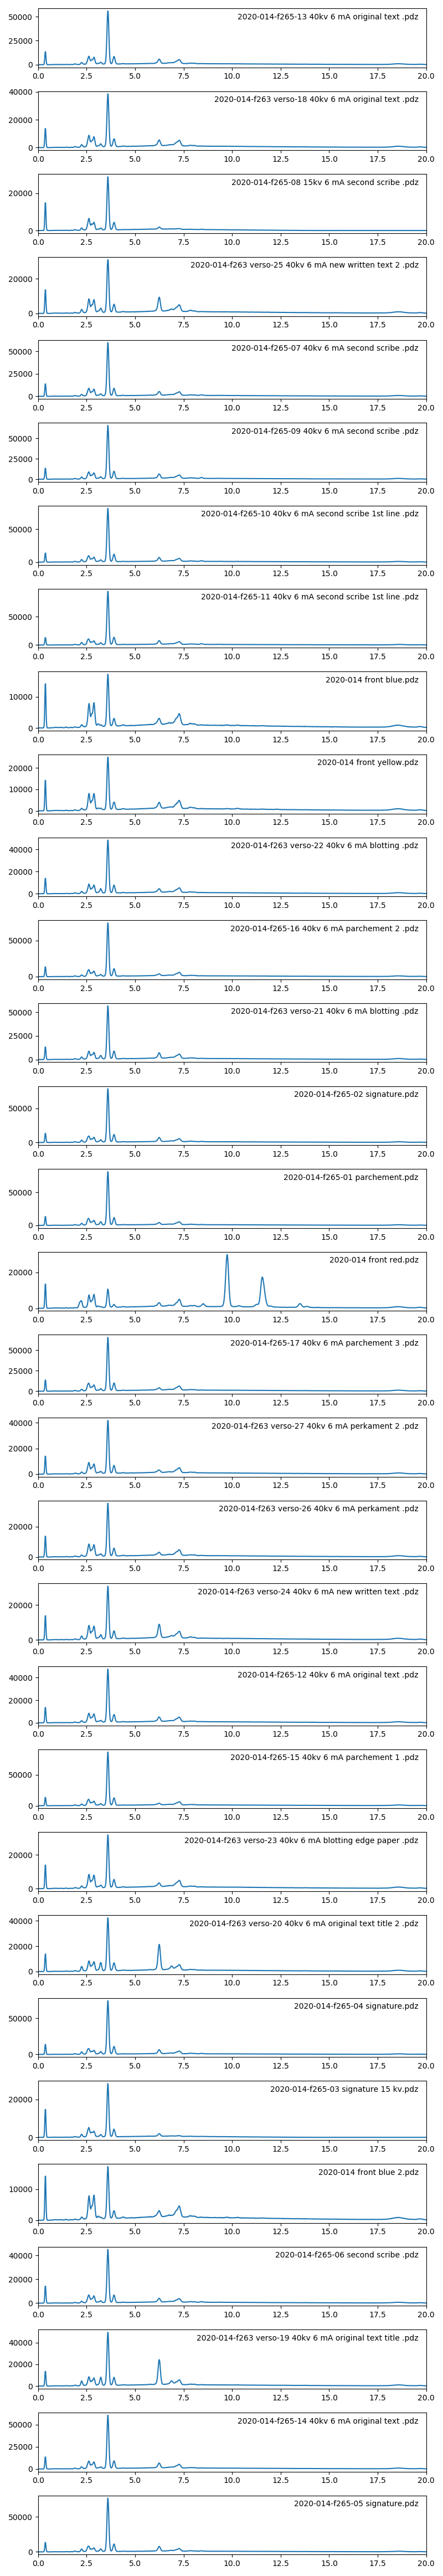

In [ ]:
fig = spectral_stackplot(pdz_file_list)

In [ ]:
fig.savefig('WN2020-014_Ets-Haim_XRF-spectra.pdf')

In [ ]:
!pwd

/mnt/datadisk/Work/Projecten/DoRe/notebooks/.2020-06-30-reading-xrf-pdz-files-with-help-of-luc/XRF measurments



    2020-06-30
## Trials with examples from Luc 

Unfortunately, the new Bruker (?) instrument produces .pdz files with a new binary format, as explained by Luc: 

>Van: "Megens, Luc" <L.Megens@cultureelerfgoed.nl> 
Datum: 29 juni 2020 om 21:08:43 CEST 
Aan: "Ligterink, Frank" <F.Ligterink@cultureelerfgoed.nl> 
Onderwerp: pdz hack
>
>Dag Frank,
>
>Bij deze de PdzReader en drie voorbeelden. In de Reader moet de functie readPdz25() hebben voor de huidige versie van pdz files.
>
>Java is Big endian, maar de Pdz files little endian, dus er zit wat conversie in die in Python geloof ik niet nodig is.
>
>Float 16 bit floating point
>Short 16 bit integer
>
>Int 32 bit integer
>
>Double 32 bit floating point
>
>
>Met vriendelijke groet,
>
>dr. L. (Luc) Megens
>Senior Onderzoeker

Not trivial. Here is some documentation, but no format specification. 
http://www.xrf.guru/WorkshopVI/TracerDocumentation/TutorialPDFs/files/S1PXRF%20Instructions.pdf

## Trials 

Ehm, can not see a clear pattern in the data files in the hex editor. Will do some trial and error using python. I did something comparable in: http://localhost:8888/notebooks/Work/Projecten/DoRe/notebooks/2019-03-17-vsc-utils-dev.ipynb 

See: https://docs.python.org/3/library/struct.html

In [ ]:
cd .2020-06-30-reading-xrf-pdz-files-with-help-of-luc

/mnt/datadisk/Work/Projecten/DoRe/notebooks/.2020-06-30-reading-xrf-pdz-files-with-help-of-luc


In [ ]:
!ls -l

total 60
-rw-rw-r-- 1 frank frank  9130 jun 30 09:41 '00886-Spectrometer Mode.pdz'
-rw-rw-r-- 1 frank frank  8660 jun 30 09:41 '01-lichte huid kin onder lip rechts.pdz'
-rw-rw-r-- 1 frank frank  9068 jun 30 09:41 '02839-Mudrock Dual.pdz'
-rw-rw-r-- 1 frank frank 22789 jun 30 09:41  PdzReader.java


In [ ]:
import struct 
import numpy as np 
import os 
import matplotlib.pyplot as plt
import glob

plt.ioff()

In [ ]:
%matplotlib notebook

In [ ]:
def unpack(pdz_file, fmt, offset=0): 
    '''Bite of some bytes'''
    
    nbytes = struct.calcsize(fmt) 
    
    with open(pdz_file, 'rb') as fh:
        
        fh.read(offset)
        buffer = fh.read(nbytes) 
    
    char_list = struct.unpack(fmt, buffer) 
    
    return char_list 


def get_spectrum(pdz_file): 
    '''Skip header and read last 2048 four-byte integers from pdz_file'''
    
    n_channels = 2048 
    file_size = os.path.getsize(pdz_file)
    offset = file_size - 4 * n_channels 
    fmt = 'i' * n_channels 
    
    counts = np.array(unpack(pdz_file, fmt, offset=offset)) 
    
    # no energies yet 
    channels = np.arange(len(counts))
    
    return channels, counts

def spectral_stackplot(pdz_file_list): 
    
    spectra = [get_spectrum(pdz_file) for pdz_file in pdz_file_list]
    
    nrows = len(spectra)
    
    fig, axs = plt.subplots(nrows=nrows, ncols=1, figsize=[10, nrows * 1.2], squeeze=False, sharex=True)
    
    for i, [x, y] in enumerate(spectra): 
        axs[i, 0].plot(x, y, label=pdz_file_list[i])
        axs[i, 0].legend()
    
    return fig


In [ ]:
pdz_file_list = glob.glob('*.pdz')

In [ ]:
!ls -l *.pdz

-rw-rw-r-- 1 frank frank 9130 jun 30 09:41 '00886-Spectrometer Mode.pdz'
-rw-rw-r-- 1 frank frank 8660 jun 30 09:41 '01-lichte huid kin onder lip rechts.pdz'
-rw-rw-r-- 1 frank frank 9068 jun 30 09:41 '02839-Mudrock Dual.pdz'


In [ ]:
pdz_file = '01-lichte huid kin onder lip rechts.pdz'

<IPython.core.display.Javascript object>


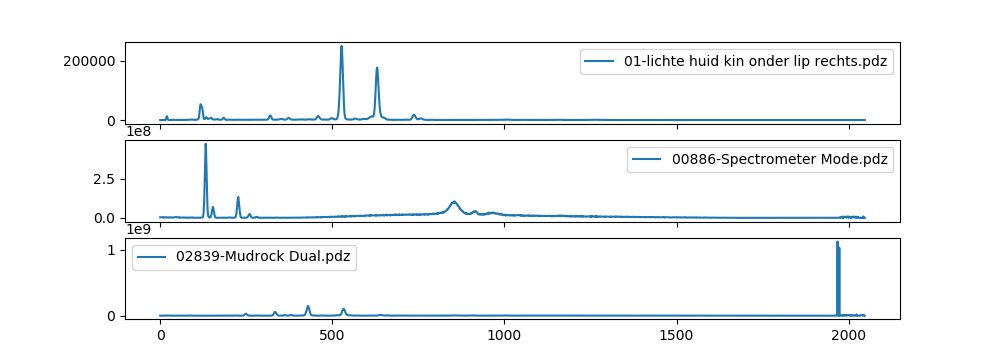

In [ ]:
spectral_stackplot(pdz_file_list)

In [ ]:
y = np.array(unpack(pdz_file, 'i'*2048, offset=468))
x = np.arange(len(y))

<IPython.core.display.Javascript object>


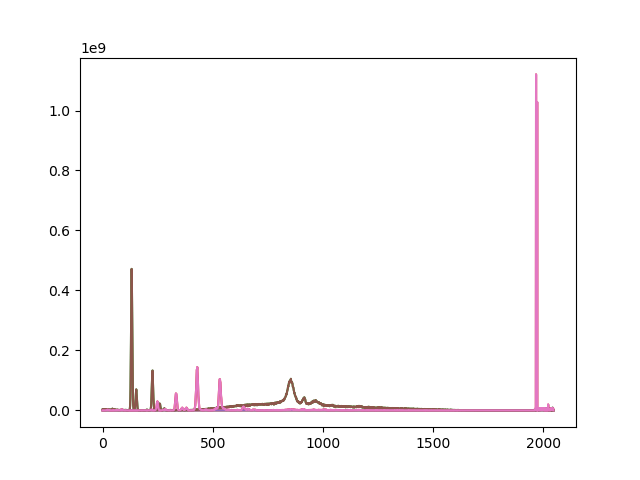

[<matplotlib.lines.Line2D>]

In [ ]:
plt.plot(x, y)

In [ ]:
str([x.decode('utf16') for x in unpack(pdz_file, '2s'*800)])

"['\\x19', '\\x0e', '\\x00', 'p', 'd', 'z', '2', '5', '\\x01', '\\x00', '\\x01', 'Þ', '\\x00', '\\x08', '\\x00', '9', '0', '0', 'F', '4', '7', '6', '7', '\\x08', '\\x00', 'S', 'K', '5', '-', '4', '7', '6', '7', 'ⴭ', '䄭', '}', '\\x03', '\\x00', 'S', 'D', 'D', '\\x04', '\\x00', 'R', 'x', 'B', 'x', '\\x00', '\\x07', '\\x00', 'M', 'o', 'v', 'a', 'b', 'l', 'e', '\\x08', '\\x00', '\\x01', '\\t', '\\x00', '8', '.', '0', '.', '0', '.', '4', '7', '6', '\\x02', '\\x06', '\\x00', '2', '0', '0', '.', '3', '9', '\\x03', '\\x04', '\\x00', '6', '.', '0', '3', '\\x04', '\\x04', '\\x00', '3', '.', '0', '3', '\\x05', '\\x04', '\\x00', '9', '.', '2', 'F', '\\x06', '\\x06', '\\x00', '2', '0', '0', '.', '3', '9', '\\x07', '\\x04', '\\x00', '1', '.', '1', '1', '\\x08', '\\x04', '\\x00', '1', '.', '0', '1', '\\x02', '\\\\', '\\x00', '\\x01', '\\x00', 'െ', '\\x95', 'ˑ', 'k', '\\x00', '\\x00', '\\x00', '\\x00', 'ᅭ', '䊩', '\\uf341', '䊍', '茐', '䆨', 'ⴊ', '䅖', 'ꓠ', '䉇', '\\x00', '䊴', '\\x05', '\\x00', 'A', 'r', 't

In [ ]:
unpack(pdz_file, 'H'*800)

(25,
 14,
 0,
 112,
 100,
 122,
 50,
 53,
 1,
 0,
 1,
 222,
 0,
 8,
 0,
 57,
 48,
 48,
 70,
 52,
 55,
 54,
 55,
 8,
 0,
 83,
 75,
 53,
 45,
 52,
 55,
 54,
 55,
 11565,
 16685,
 125,
 3,
 0,
 83,
 68,
 68,
 4,
 0,
 82,
 120,
 66,
 120,
 0,
 7,
 0,
 77,
 111,
 118,
 97,
 98,
 108,
 101,
 8,
 0,
 1,
 9,
 0,
 56,
 46,
 48,
 46,
 48,
 46,
 52,
 55,
 54,
 2,
 6,
 0,
 50,
 48,
 48,
 46,
 51,
 57,
 3,
 4,
 0,
 54,
 46,
 48,
 51,
 4,
 4,
 0,
 51,
 46,
 48,
 51,
 5,
 4,
 0,
 57,
 46,
 50,
 70,
 6,
 6,
 0,
 50,
 48,
 48,
 46,
 51,
 57,
 7,
 4,
 0,
 49,
 46,
 49,
 49,
 8,
 4,
 0,
 49,
 46,
 48,
 49,
 2,
 92,
 0,
 1,
 0,
 3398,
 149,
 721,
 107,
 0,
 0,
 0,
 0,
 4461,
 17065,
 62273,
 17037,
 33552,
 16808,
 11530,
 16726,
 42208,
 16967,
 0,
 17076,
 5,
 0,
 65,
 114,
 116,
 97,
 120,
 9,
 0,
 56,
 46,
 48,
 46,
 48,
 46,
 52,
 55,
 54,
 4,
 0,
 116,
 101,
 115,
 116,
 3,
 8308,
 0,
 0,
 0,
 3398,
 149,
 721,
 107,
 0,
 0,
 0,
 0,
 0,
 17076,
 62273,
 17037,
 33552,
 16808,
 11530,
 16726,
 42208,

In [ ]:
fmt = 'hhh' # formt string is 3x short (little endian 2-byte integer) 
hsize = struct.calcsize(fmt) # 6 bytes 
hsize

6

In [ ]:
with open(pdz_file, 'rb') as fh:

    hbytes = fh.read(hsize) 

start, stop, step  = struct.unpack(fmt, hbytes) 
start, stop, step

(25, 14, 0)